# PDAP2019.2: Homework 06 (10 Dec 2019)

### *Due date: 07 Jan 2020*

## Logistics

* This homework exercise consists of this notebook.
* Submit this homework by saving this notebook to the folder `/home/pdap2019/YOURUSERNAME/homework/06/` on your Jupyter at https://aether.uni-bremen.de/lamoslab (you will need to create that folder).  For example, if your username is `pdap19zz`, the correct directory would be `/home/pdap2019/pdap19zz/homework/06`.  **I will NOT accept submissions to other folders!!!**
* Make sure that in that folder, there is only one `*.ipynb` file.  **If there is more than one `*.ipynb` in the submission folder, I will not correct your homework!**
* I will collect your submission **on Tuesday 07 Jan 2020 at 08:00** automatically.  Late submission is not possible.  Submission via other means is not possible.
* You can use the command `pdap2019_check_submission` (on the Terminal, not in a notebook!) to see if you placed the file in the correct location.  Please use this tool.  **I will NOT accept submissions to other folders!!!**

## The situation: Spectroscopic analysis (NO2)

In [1]:
import pandas as pd

We work with the NO2 absorption cross section by Bogumil et al. (2003), which is available from http://satellite.mpic.de/spectral_atlas/cross_sections/Nitrogen%20oxides/NO2_Bogumil(2003)_273K_230-890nm.txt. Here I do the work of reading these data into a Pandas DataFrame for you (the wavelength is given in nm):

In [2]:
df = pd.read_csv('/data/pdap/no2_bogumil_273K.txt',
                 delim_whitespace=True, comment='#')
df.head()

wavelength  cross_section
0    233.0807   2.566016e-19
1    233.2139   2.299417e-19
2    233.3470   2.124074e-19
3    233.4800   1.931201e-19
4    233.6129   1.704887e-19

Now assume that you have an instrument which measures at each full `nm` wavelength in the `300..400 nm` interval, i.e., at 300nm, 301nm, 302nm, ..., 399nm, 400nm.

### Task

Interpolate the original NO2 absorption cross section to the wavelengths which your instrument can measure at.  

Do this twice, once with *linear* interpolation and once with *cubic* interpolation.

Compare the two results.

In [3]:
from scipy.interpolate import interp1d

In [4]:
f_lin = interp1d(df.wavelength, df.cross_section, 'linear')

In [5]:
f_cub = interp1d(df.wavelength, df.cross_section, 'cubic')

In [6]:
import numpy as np

In [7]:
wave = np.linspace(300, 400, 101)

In [8]:
res_lin  = f_lin(wave)

In [9]:
res_cub = f_cub(wave)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
plt.plot(wave, res_lin, label='lin.')
plt.plot(wave, res_cub, label='cub.')
plt.legend();

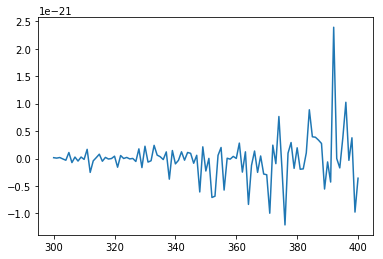

In [12]:
plt.plot(wave, res_cub - res_lin)

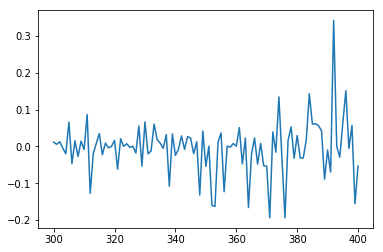

In [14]:
plt.plot(wave, 100. * (res_cub - res_lin) / res_cub)